In [1]:
import matplotlib.pyplot as plt
import gzip
import numpy as np
from numpy.linalg import *
from matplotlib import rcParams
from sklearn import linear_model
import random

# import sklearn

# rcParams.update({'font.size': 18})

In [2]:
%matplotlib inline  

In [3]:
#functions that are used throughout 
def find_results(data, x):
    #Takes the data and the x results of a fit and finds the predicted results 
    # along with the predicted results maximized by each column
    f = np.matmul(data, x)
    f_max = np.zeros(f.shape)
    for i in range(len(data)):
        f_max[i, np.argmax(f[i])] = 1
    return f, f_max

def find_error(data, labels, x):
    #finds the error in the results and the maximized results.
    f, f_max = find_results(data, x)
    f_error = np.linalg.norm(labels - f, ord=2)/np.linalg.norm(labels, ord=2)
    f_max_error = np.linalg.norm(labels - f_max, ord=2)/np.linalg.norm(labels, ord=2)
    return f_error, f_max_error

def find_num_right(x, data, labels):
    f,f_max = find_results(data, x)
    num_right = 0
    looking = f_max - labels
    for i in range(len(f)):
#         print(looking[i])
        if max(abs(looking [i])) == 0:
            num_right += 1
    return num_right

def count_num_zero(x):
    #counts the number of elements that have zero for all 10
    num_zero= 0
    for i in range(len(x)):
        if(max(x[i]))==0:
            num_zero += 1
    return num_zero

In [4]:

f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 60000 


print(image_size * image_size * num_images)
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
print(len(data))
print(len(buf))
data = data.reshape(num_images, image_size* image_size)

print(data.shape)


# image = np.asarray(data[3]).squeeze()
# plt.imshow(image)
# plt.show()

47040000
47040000
47040000
(60000, 784)


In [5]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(image_size * image_size * num_images)
labels_num = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

# print(labels_num[3:10])
print(labels_num.shape)

#set_up b vector right
labels = np.zeros([num_images, 10])
# print(labels[1][1])
for i in range(num_images):
    if labels_num[i] == 0:
        labels[i,9] = 1
    else:
        index = int(labels_num[i] - 1)
        labels[i][index] = 1
print(labels)


(60000,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [6]:
#get test data
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

# image_size = 28
num_images_test = 10000 
f.read(16)
buf = f.read(image_size * image_size * num_images_test)
test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(num_images_test, image_size* image_size)

print(test_data.shape)

f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(image_size * image_size * num_images_test)
labels_num = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

#set_up b vector right
test_labels = np.zeros([num_images_test, 10])
for i in range(num_images_test):
    if labels_num[i] == 0:
        test_labels[i,9] = 1
    else:
        index = int(labels_num[i] - 1)
        test_labels[i][index] = 1
print(test_labels.shape)

(10000, 784)
(10000, 10)


In [7]:
tup  = np.linalg.lstsq(data, labels)
x1 = tup[0]
f1, f1_max = find_results(data, x1)
right1 = find_num_right(x1, data, labels)
right_test1 = find_num_right(x1, test_data, test_labels)
zero1 = count_num_zero(x1)
print(right1/60000)
print(right_test1/10000)
print(zero1)

C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


0.85195
0.8532
14


In [8]:
print(np.shape(x1))

(784, 10)


In [9]:
x2 = np.matmul(np.linalg.pinv(data), labels)
right2 = find_num_right(x2, data, labels)
right_test2 = find_num_right(x2, test_data, test_labels)
zero2 = count_num_zero(x2)
print(right2/60000)
print(right_test2/10000)
print(zero2)

0.8519333333333333
0.8534
14


In [10]:
def predict_lasso(alpha, data, labels, test  = False):
    print(alpha)
    clf = linear_model.Lasso(alpha=alpha)
    clf.fit(data, labels)
    x = clf.coef_
    x = np.transpose(x)
#     f, f_max = find_results(data, x)
#     error, error_max = find_error(data, labels, x)
    num_zero = count_num_zero(x)
    num_right = find_num_right(x, data, labels)
    if test:
            num_right_test = find_num_right(x, test_data, test_labels)
            return num_zero, num_right, num_right_test, x
    
    return num_zero, num_right, x

# error, error_max, num_zero = predict_lasso(0.1, data, labels)

def many_lasso(num, data, labels, lower = 0.1, upper = 1, plot=True):
    alpha_list = []
    right_list = []
    num_zero_list = []
    for alpha in np.linspace(lower, upper, num):
        print(alpha)
        num_zero, num_right = predict_lasso(alpha, data, labels)
#         error_list.append(error)
#         error_max_list.append(error_max)
        right_list.append(num_right)
        num_zero_list.append(num_zero)
        alpha_list.append(alpha)
        
    if plot:
        plt.plot(num_zero_list, right_list, 'ob')
#         plt.plot(num_zero_list, error_list, 'or')

    return alpha_list, right_list, num_zero_list

def many_lasso_test(num, data, labels, lower = 0.1, upper = 1, plot=True):
    alpha_list = []
    right_list = []
    num_zero_list = []
    right_test_list = []
    x_list = []
    for alpha in np.linspace(lower, upper, num):
        print(alpha)
        num_zero, num_right, num_right_test, x = predict_lasso(alpha, data, labels, test = True)
#         error_list.append(error)
#         error_max_list.append(error_max)
        right_list.append(num_right)
        num_zero_list.append(num_zero)
        alpha_list.append(alpha)
        right_test_list.append(num_right_test)
        x_list.append(x)
        
    try:
        if plot:
            plt.plot(num_zero_list, right_list, 'ob')
            plt.plot(num_zero_list, right_test_list, 'or')
    except:
        print("Problem plotting")

    return alpha_list, right_list, num_zero_list, right_test_list, x_list


In [11]:
zero3, right3, right_test3, x3 = predict_lasso(0.1, data, labels, test = True)
print(right3/60000)
print(right_test3/10000)
print(zero3)

0.1
0.8051333333333334
0.8087
316


In [12]:
zero4, right4, right_test4, x4 = predict_lasso(1.0, data, labels, test = True)
print(right4/60000)
print(right_test4/10000)
print(zero4)

1.0
0.7714666666666666
0.777
507


In [13]:
#robust and ridge too
ridge = linear_model.Ridge(alpha=1.0).fit(data,labels)
x6 = ridge.coef_
x6 = x6.transpose()
zero6 = count_num_zero(x6)
right6 = find_num_right(x6, data, labels)
right_test6 = find_num_right(x6, test_data, test_labels)
print(right6/60000)
print(right_test6/10000)
print(zero6)

C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.03801e-11): result may not be accurate.
  overwrite_a=True).T


0.81355
0.8115
67


In [14]:
regr3 = linear_model.ElasticNet(alpha=1.0, copy_X=True, l1_ratio=0.1, max_iter=10**5,random_state=0)
regr3.fit(data, labels)  
x7 = regr3.coef_
x7 =np. transpose(x7)
print(x7)
zero7 = count_num_zero(x7)
right7 = find_num_right(x7, data, labels)
right_test7 = find_num_right(x7, test_data, test_labels)
print(right7/60000)
print(right_test7/10000)
print(zero7)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0.8051666666666667
0.8086
316


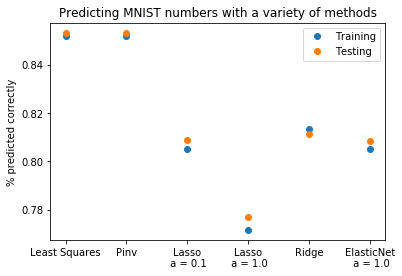

In [15]:
x = np.array([0,1,2,3,4, 5])
y = np.array([right1, right2, right3, right4, right6, right7])
z = np.array([right_test1, right_test2, right_test3, right_test4, right_test6, right_test7])
y = np.divide(y, num_images)
z = np.divide(z, 10000)
my_xticks = ['Least Squares', 'Pinv', "Lasso\n a = 0.1", "Lasso\n a = 1.0", "Ridge", "ElasticNet\n a = 1.0"]
plt.xticks(x, my_xticks)
plt.plot(x, y, 'o', label = "Training")
plt.plot(x,z, 'o', label = "Testing")
plt.ylabel("% predicted correctly")
plt.title("Predicting MNIST numbers with a variety of methods")
plt.legend()
plt.show()

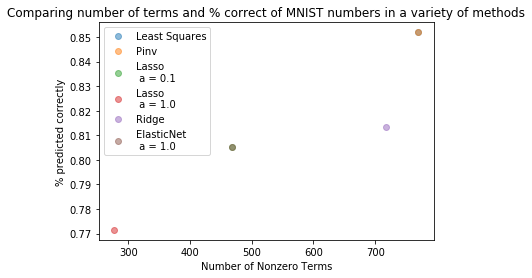

In [16]:
x = np.array([zero1, zero2, zero3, zero4, zero6, zero7])
y = np.array([right1, right2, right3, right4, right6, right7])
z = np.array([right_test1, right_test2, right_test3, right_test4, right_test6, right_test7])
y = np.divide(y, num_images)
z = np.divide(z, 10000)
my_xticks = ['Least Squares', 'Pinv', "Lasso\n a = 0.1", "Lasso\n a = 1.0", "Ridge", "ElasticNet\n a = 1.0"]
# plt.xticks(x, my_xticks)
x = np.ones(len(x))*image_size**2 - x
for i in range(len(x)):
    plt.plot(x[i], y[i], 'o', label = my_xticks[i], alpha = 0.5)
# plt.plot(x,z, 'o', label = "Testing")
plt.ylabel("% predicted correctly")
plt.xlabel("Number of Nonzero Terms")
plt.title("Comparing number of terms and % correct of MNIST numbers in a variety of methods")
plt.legend()
plt.show()
# print(x)